In [72]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

In [73]:
batch_size = 20

In [74]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [75]:
my_output = tf.multiply(x_data, A)

In [76]:
loss = tf.reduce_mean(tf.square(my_output - y_target))

In [77]:
init = tf.global_variables_initializer()
sess.run(init)

In [78]:
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [79]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[ 0.76676887]]
Loss = 85.0834
Step #10 A = [[ 2.4722538]]
Loss = 57.788
Step #15 A = [[ 3.85539079]]
Loss = 38.3031
Step #20 A = [[ 4.97910547]]
Loss = 24.4071
Step #25 A = [[ 5.8921504]]
Loss = 17.9916
Step #30 A = [[ 6.63595152]]
Loss = 11.3917
Step #35 A = [[ 7.24213266]]
Loss = 6.81979
Step #40 A = [[ 7.74985123]]
Loss = 6.52605
Step #45 A = [[ 8.1337471]]
Loss = 5.25982
Step #50 A = [[ 8.44218445]]
Loss = 2.7871
Step #55 A = [[ 8.68873596]]
Loss = 3.71197
Step #60 A = [[ 8.90951824]]
Loss = 2.0184
Step #65 A = [[ 9.06173992]]
Loss = 1.32571
Step #70 A = [[ 9.21479893]]
Loss = 2.72559
Step #75 A = [[ 9.32526779]]
Loss = 1.85007
Step #80 A = [[ 9.4183321]]
Loss = 1.36161
Step #85 A = [[ 9.47792244]]
Loss = 0.963852
Step #90 A = [[ 9.54480934]]
Loss = 0.721524
Step #95 A = [[ 9.60671616]]
Loss = 0.989431
Step #100 A = [[ 9.6639986]]
Loss = 1.13513


In [80]:
ops.reset_default_graph()
sess = tf.Session()

In [81]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

In [82]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

# Add operation to graph
my_output = tf.multiply(x_data, A)

In [83]:

# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

In [84]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [85]:
loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [ 1.53261757]
Loss = [ 71.38001251]
Step #10 A = [ 3.12871075]
Loss = [ 44.99625397]
Step #15 A = [ 4.4154253]
Loss = [ 34.36611938]
Step #20 A = [ 5.42514133]
Loss = [ 12.86611366]
Step #25 A = [ 6.26306629]
Loss = [ 15.71722603]
Step #30 A = [ 6.95100307]
Loss = [ 11.45087433]
Step #35 A = [ 7.47212076]
Loss = [ 10.30812645]
Step #40 A = [ 7.90964699]
Loss = [ 3.18812442]
Step #45 A = [ 8.29492283]
Loss = [ 4.6863637]
Step #50 A = [ 8.64748859]
Loss = [ 0.38204664]
Step #55 A = [ 8.76995182]
Loss = [ 1.45422053]
Step #60 A = [ 9.10702991]
Loss = [ 0.98171091]
Step #65 A = [ 9.18103409]
Loss = [ 0.11531559]
Step #70 A = [ 9.32535076]
Loss = [ 0.015516]
Step #75 A = [ 9.57402325]
Loss = [ 0.11672929]
Step #80 A = [ 9.55693054]
Loss = [ 0.0207017]
Step #85 A = [ 9.56188679]
Loss = [ 1.12496197]
Step #90 A = [ 9.68716526]
Loss = [ 0.44197005]
Step #95 A = [ 9.67840385]
Loss = [ 0.02587289]
Step #100 A = [ 9.78861046]
Loss = [ 0.00069221]


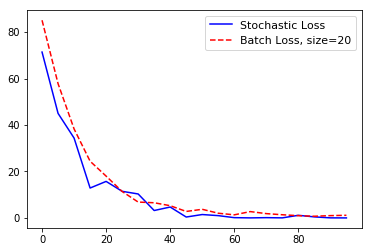

In [86]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()